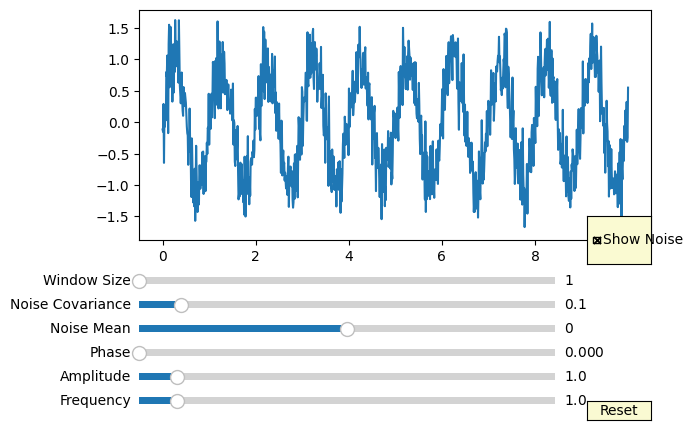

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, CheckButtons

# Функція фільтру простого ковзного середнього
def simple_moving_average(data, window_size):
    filtered_data = []
    for i in range(len(data)):
        if i < window_size:
            filtered_data.append(np.mean(data[:i+1]))
        else:
            filtered_data.append(np.mean(data[i-window_size+1:i+1]))
    return np.array(filtered_data)

# Оновлена функція гармоніки з шумом та фільтрацією
def harmonic_with_noise_filtered(t, amplitude, frequency, phase, noise_mean, noise_covariance, show_noise, window_size):
    global previous_noise
    if noise_mean != harmonic_with_noise_filtered.previous_noise_mean or noise_covariance != harmonic_with_noise_filtered.previous_noise_covariance:
        harmonic_with_noise_filtered.previous_noise_mean = noise_mean
        harmonic_with_noise_filtered.previous_noise_covariance = noise_covariance
        noise = np.random.normal(noise_mean, np.sqrt(noise_covariance), len(t))
        harmonic_with_noise_filtered.previous_noise = noise
    else:
        noise = harmonic_with_noise_filtered.previous_noise

    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    if show_noise:
        noisy_signal = signal + noise
        return simple_moving_average(noisy_signal, window_size)
    else:
        return simple_moving_average(signal, window_size)

harmonic_with_noise_filtered.previous_noise = None
harmonic_with_noise_filtered.previous_noise_mean = None
harmonic_with_noise_filtered.previous_noise_covariance = None

# Параметри за замовчуванням
amplitude_default = 1.0
frequency_default = 1.0
phase_default = 0.0
noise_mean_default = 0.0
noise_covariance_default = 0.1
window_size_default = 1

# Збереження попередніх значень параметрів
prev_amplitude = amplitude_default
prev_frequency = frequency_default
prev_phase = phase_default
prev_noise_mean = noise_mean_default
prev_noise_covariance = noise_covariance_default
prev_window_size = window_size_default

# Генерація часових значень
t = np.linspace(0, 10, 1000)

# Створення фігури та вісей
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.4)

# Побудова графіка
line, = ax.plot(t, harmonic_with_noise_filtered(t, amplitude_default, frequency_default, phase_default, noise_mean_default, noise_covariance_default, True, window_size_default))

# Додавання слайдерів
axcolor = 'lightgoldenrodyellow'
ax_amplitude = plt.axes([0.1, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_frequency = plt.axes([0.1, 0.05, 0.65, 0.03], facecolor=axcolor)
ax_phase = plt.axes([0.1, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_noise_mean = plt.axes([0.1, 0.2, 0.65, 0.03], facecolor=axcolor)
ax_noise_covariance = plt.axes([0.1, 0.25, 0.65, 0.03], facecolor=axcolor)
ax_window_size = plt.axes([0.1, 0.3, 0.65, 0.03], facecolor=axcolor)

s_amplitude = Slider(ax_amplitude, 'Amplitude', 0.1, 10.0, valinit=amplitude_default)
s_frequency = Slider(ax_frequency, 'Frequency', 0.1, 10.0, valinit=frequency_default)
s_phase = Slider(ax_phase, 'Phase', 0, 2*np.pi, valinit=phase_default)
s_noise_mean = Slider(ax_noise_mean, 'Noise Mean', -1.0, 1.0, valinit=noise_mean_default)
s_noise_covariance = Slider(ax_noise_covariance, 'Noise Covariance', 0.0, 1.0, valinit=noise_covariance_default)
s_window_size = Slider(ax_window_size, 'Window Size', 1, 100, valinit=window_size_default, valstep=1)

# Функція для обробки подій чекбокса
def toggle_noise(label):
    show_noise = check.get_status()[0]  # Отримати значення видимості з об'єкта чекбокса
    line.set_ydata(harmonic_with_noise_filtered(t, prev_amplitude, prev_frequency, prev_phase, prev_noise_mean, prev_noise_covariance, show_noise, prev_window_size))
    fig.canvas.draw_idle()

# Додавання чекбокса
ax_check = plt.axes([0.8, 0.35, 0.1, 0.1], facecolor=axcolor)
check = CheckButtons(ax_check, ['Show Noise'], [True])
check.on_clicked(toggle_noise)

# Оновлення графіка при зміні значень слайдерів
def update(val):
    global prev_amplitude, prev_frequency, prev_phase, prev_noise_mean, prev_noise_covariance, prev_window_size
    amplitude = s_amplitude.val
    frequency = s_frequency.val
    phase = s_phase.val
    noise_mean = s_noise_mean.val
    noise_covariance = s_noise_covariance.val
    window_size = int(s_window_size.val)

    # Перевірка на зміну параметрів
    if amplitude != prev_amplitude or frequency != prev_frequency or phase != prev_phase:
        prev_amplitude = amplitude
        prev_frequency = frequency
        prev_phase = phase
        line.set_ydata(harmonic_with_noise_filtered(t, amplitude, frequency, phase, prev_noise_mean, prev_noise_covariance, check.get_status()[0], window_size))
    elif noise_mean != prev_noise_mean or noise_covariance != prev_noise_covariance or window_size != prev_window_size:
        prev_noise_mean = noise_mean
        prev_noise_covariance = noise_covariance
        prev_window_size = window_size
        line.set_ydata(harmonic_with_noise_filtered(t, prev_amplitude, prev_frequency, prev_phase, noise_mean, noise_covariance, check.get_status()[0], window_size))

    fig.canvas.draw_idle()

s_amplitude.on_changed(update)
s_frequency.on_changed(update)
s_phase.on_changed(update)
s_noise_mean.on_changed(update)
s_noise_covariance.on_changed(update)
s_window_size.on_changed(update)

# Додавання кнопки скидання
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    s_amplitude.reset()
    s_frequency.reset()
    s_phase.reset()
    s_noise_mean.reset()
    s_noise_covariance.reset()
    s_window_size.reset()
button.on_clicked(reset)

plt.show()
